In [ ]:
!pip install qiskit
!pip install qiskit[visualization]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.8 MB 34.8 MB/s 
     |████████████████████████████████| 19.2 MB 9.1 MB/s 
     |████████████████████████████████| 240 kB 66.6 MB/s 
     |████████████████████████████████| 55 kB 3.2 MB/s 
     |████████████████████████████████| 106 kB 46.3 MB/s 
     |████████████████████████████████| 37.5 MB 59 kB/s 
     |████████████████████████████████| 943 kB 58.9 MB/s 
     |████████████████████████████████| 50 kB 6.5 MB/s 
     |████████████████████████████████| 49 kB 6.3 MB/s 
     |████████████████████████████████| 4.0 MB 64.1 MB/s 
     |████████████████████████████████| 1.9 MB 46.4 MB/s 
     |████████████████████████████████| 112 kB 48.4 MB/s 
  Created wheel for qiskit: filename=qiskit-0.39.3-py3-none-any.whl size=12262 sha256=1cfd3e0be7da4a5ef826b6968fd799a9f496777db50e98fde0485dfc189878e5
  Stored in directory: /root/.cache/pip/wheels/b1/36/b2/6eb4e

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.


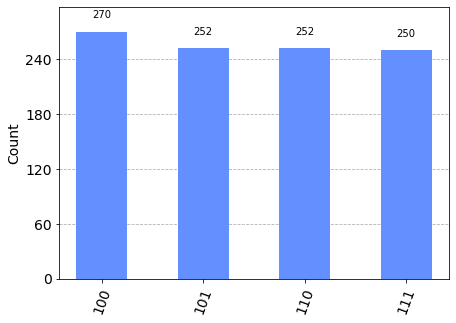

In [ ]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram

circ1=QuantumCircuit(4,3)
circ1.x(3)
circ1.h(range(4))
circ1.draw()

circ2=QuantumCircuit(4,3)
circ2.barrier(range(4))
circ2.cx(0,3)
circ2.x(0)
circ2.cx(0,3)
circ2.cx(1,3)
circ2.x(1)
circ2.cx(1,3)
circ2.cx(2,3)
circ2.x(2)
circ2.cx(2,3)
circ2.barrier(range(4))
circ2.draw()

circ3=QuantumCircuit(4,3)
circ3.h((0,1,2))
circ3.measure((0,1,2),(0,1,2))
circ3.draw() 

circ4=QuantumCircuit(4,3)
circ4.barrier(range(4))
circ4.cx(2,3)
circ4.cx(1,3)
circ4.ccx(0,1,3)
circ4.barrier(range(4))
circ4.draw()

circDJ=circ1+circ4+circ3
#circDJ.draw()

backend =  Aer.get_backend("qasm_simulator")
job = execute(circDJ,backend, shot=1)
result = job.result()
count = result.get_counts(circDJ)
plot_histogram(count)




In [ ]:
circDJ.draw()

┌───┐      ░                 ░ ┌───┐┌─┐      
q_0: ┤ H ├──────░─────────────■───░─┤ H ├┤M├──────
     ├───┤      ░             │   ░ ├───┤└╥┘┌─┐   
q_1: ┤ H ├──────░────────■────■───░─┤ H ├─╫─┤M├───
     ├───┤      ░        │    │   ░ ├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├──────░───■────┼────┼───░─┤ H ├─╫──╫─┤M├
     ├───┤┌───┐ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘ ║  ║ └╥┘
q_3: ┤ X ├┤ H ├─░─┤ X ├┤ X ├┤ X ├─░───────╫──╫──╫─
     └───┘└───┘ ░ └───┘└───┘└───┘ ░       ║  ║  ║ 
c: 3/═════════════════════════════════════╩══╩══╩═
                                          0  1  2